<a href="https://colab.research.google.com/github/akdrkr/Machine-Learning/blob/main/fbPROBHET_to_predict_BTC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install prophet

     |████████████████████████████████| 65 kB 1.7 MB/s 
     |████████████████████████████████| 49 kB 3.9 MB/s 
     |████████████████████████████████| 43 kB 1.5 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6640214 sha256=8208dec4a968408043cdd7bce0c72ddc9085d357000307c9acc2039c8ab27de9
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


In [ ]:
pip install yfinance

     |████████████████████████████████| 6.4 MB 17.2 MB/s 
     |████████████████████████████████| 63 kB 1.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
from fbprophet import Prophet
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from fbprophet.plot import plot_plotly

In [ ]:
df=yf.download('BTC-USD')

[*********************100%***********************]  1 of 1 completed


In [ ]:
df.reset_index(inplace=True)
df=df[['Date','Adj Close']]
df.columns=['ds','y']

In [ ]:
df

,ds,y
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990
3,2014-09-20,408.903992
4,2014-09-21,398.821014
...,...,...
2745,2022-03-24,43960.933594
2746,2022-03-25,44348.730469
2747,2022-03-26,44500.828125
2748,2022-03-27,46820.492188


In [ ]:
model=Prophet()


In [ ]:
model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
model.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [ ]:
future_dates=model.make_future_dataframe(periods=60)

In [ ]:
future_dates.tail()

,ds
2805,2022-05-23
2806,2022-05-24
2807,2022-05-25
2808,2022-05-26
2809,2022-05-27


In [ ]:
prediction=model.predict(future_dates)

In [ ]:
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-09-17,-176.351384,-8836.001445,5546.581099,-176.351384,-176.351384,-1247.992606,-1247.992606,-1247.992606,39.099135,39.099135,39.099135,-1287.091741,-1287.091741,-1287.091741,0.0,0.0,0.0,-1424.343990
1,2014-09-18,-174.992039,-8711.043140,5839.131395,-174.992039,-174.992039,-1359.288422,-1359.288422,-1359.288422,-18.727760,-18.727760,-18.727760,-1340.560662,-1340.560662,-1340.560662,0.0,0.0,0.0,-1534.280461
2,2014-09-19,-173.632694,-9214.934251,5435.474509,-173.632694,-173.632694,-1394.476175,-1394.476175,-1394.476175,-6.851528,-6.851528,-6.851528,-1387.624647,-1387.624647,-1387.624647,0.0,0.0,0.0,-1568.108869
3,2014-09-20,-172.273349,-9662.346759,5692.411704,-172.273349,-172.273349,-1423.974383,-1423.974383,-1423.974383,3.613954,3.613954,3.613954,-1427.588337,-1427.588337,-1427.588337,0.0,0.0,0.0,-1596.247732
4,2014-09-21,-170.914004,-8296.837096,6194.093674,-170.914004,-170.914004,-1478.704803,-1478.704803,-1478.704803,-18.879566,-18.879566,-18.879566,-1459.825237,-1459.825237,-1459.825237,0.0,0.0,0.0,-1649.618807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2805,2022-05-23,61804.064685,54215.406194,69517.403367,61709.589208,61885.310182,79.646561,79.646561,79.646561,-2.632101,-2.632101,-2.632101,82.278662,82.278662,82.278662,0.0,0.0,0.0,61883.711246
2806,2022-05-24,61871.803965,54088.205424,69274.683642,61773.995491,61958.978677,-57.227525,-57.227525,-57.227525,4.377866,4.377866,4.377866,-61.605391,-61.605391,-61.605391,0.0,0.0,0.0,61814.576440
2807,2022-05-25,61939.543246,54377.409989,69635.386919,61841.924404,62031.964373,-159.177603,-159.177603,-159.177603,39.099135,39.099135,39.099135,-198.276739,-198.276739,-198.276739,0.0,0.0,0.0,61780.365642
2808,2022-05-26,62007.282526,54125.833914,68711.180863,61907.615869,62104.942167,-345.123717,-345.123717,-345.123717,-18.727760,-18.727760,-18.727760,-326.395957,-326.395957,-326.395957,0.0,0.0,0.0,61662.158810


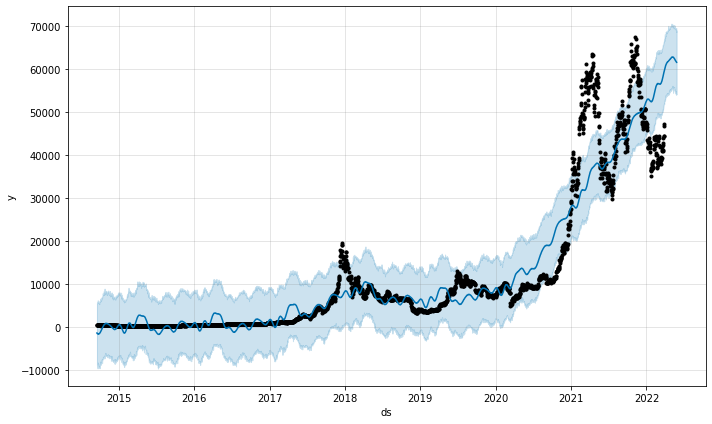

In [ ]:
fig=model.plot(prediction)

In [ ]:
plot_plotly(model,prediction)

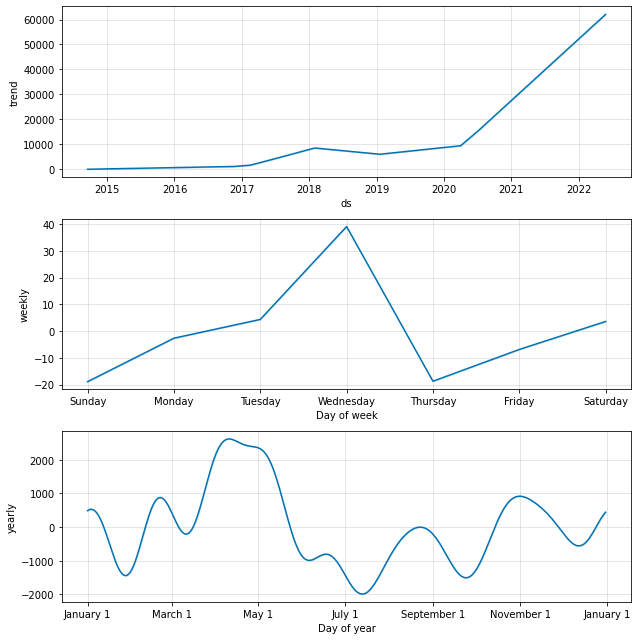

In [ ]:
fig2=model.plot_components(prediction)

In [ ]:
from fbprophet.diagnostics import cross_validation

In [ ]:
df_cv= cross_validation(model,horizon='60 days')

INFO:fbprophet:Making 78 forecasts with cutoffs between 2015-10-01 00:00:00 and 2022-01-27 00:00:00


  0%|          | 0/78 [00:00<?, ?it/s]

In [ ]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
4675,2022-03-24,67806.138131,60905.568783,74150.118578,43960.933594,2022-01-27
4676,2022-03-25,67976.025733,61468.945739,74675.203025,44348.730469,2022-01-27
4677,2022-03-26,68083.058049,61977.400748,74482.835273,44500.828125,2022-01-27
4678,2022-03-27,68161.939475,61655.874104,74527.764193,46820.492188,2022-01-27
4679,2022-03-28,68245.896461,61737.881940,74651.439086,47244.371094,2022-01-27


In [ ]:
from fbprophet.diagnostics import performance_metrics

In [ ]:
df_performance=performance_metrics(df_cv)

In [ ]:
df_performance

,horizon,mse,rmse,mae,mape,mdape,coverage
0,6 days,4.371161e+07,6611.475934,3363.474655,0.200834,0.154251,0.346154
1,7 days,4.748396e+07,6890.860898,3481.673769,0.208161,0.157242,0.333333
2,8 days,5.123201e+07,7157.653840,3619.010559,0.217406,0.159058,0.324786
3,9 days,5.413133e+07,7357.399854,3726.940861,0.225468,0.171670,0.311966
4,10 days,5.719824e+07,7562.951605,3820.145370,0.231207,0.177705,0.314103
5,11 days,6.054512e+07,7781.074433,3921.224534,0.236828,0.187350,0.309829
6,12 days,6.216693e+07,7884.600533,3990.907460,0.241390,0.189335,0.294872
7,13 days,6.278162e+07,7923.485365,4014.117021,0.244768,0.192241,0.292735
8,14 days,6.371077e+07,7981.902491,4054.461889,0.247455,0.192241,0.284188
9,15 days,6.499909e+07,8062.201445,4096.635380,0.250582,0.196251,0.279915


/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:526: FutureWarning:

casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.

/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:527: FutureWarning:

casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.



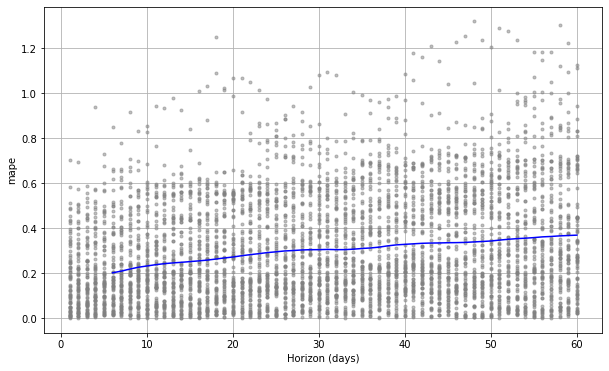

In [ ]:
from fbprophet import plot
fig2=plot.plot_cross_validation_metric(df_cv,metric='mape')